In [114]:
# import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset
df = pd.read_csv("Dataset5.csv")

# Remove tabs from column names
df.columns = df.columns.str.replace('\t', '')

# Exclude 'Date' and 'Time' initially
features = df.columns[2:]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

# Build the autoencoder model
input_layer = Input(shape=(len(features),))
encoded = Dense(64, activation='selu')(input_layer)
decoded = Dense(len(features), activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder on the entire dataset
autoencoder.fit(data_scaled, data_scaled, epochs=1, batch_size=32, shuffle=True)

# Make predictions on the entire dataset
predictions = autoencoder.predict(data_scaled)

# Calculate reconstruction errors
mse = np.mean(np.square(data_scaled - predictions), axis=1)

# Define a threshold for anomaly detection
threshold = 0.2  # You may need to tune this based on your data

# Identify anomalies
anomaly_indices = np.where(mse > threshold)[0]

# Create a DataFrame for 'Date'
date_df = df[['Date']].iloc[anomaly_indices].reset_index(drop=True)

# Print the number of anomalies and corresponding dates
print("Number of anomalies:", len(anomaly_indices))
print("Anomaly indices and corresponding dates:")
for _, row in date_df.iterrows():
    anomaly_idx = row.name  # Get the index from the DataFrame
    date_value = row['Date']
    time_value = df['Time'].iloc[anomaly_idx]
    print(f"Index: {anomaly_idx}, Date: {date_value}, Time: {time_value}")


6100/6100 [==============================] - 12s 2ms/step
Number of anomalies: 24
Anomaly indices and corresponding dates:
Index: 0, Date: 10-11-2011, Time: 39:55.0
Index: 1, Date: 10-11-2011, Time: 39:55.6
Index: 2, Date: 10-11-2011, Time: 39:57.1
Index: 3, Date: 10-11-2011, Time: 39:58.6
Index: 4, Date: 10-11-2011, Time: 40:02.2
Index: 5, Date: 10-11-2011, Time: 40:07.3
Index: 6, Date: 10-11-2011, Time: 40:08.9
Index: 7, Date: 10-11-2011, Time: 40:10.4
Index: 8, Date: 10-11-2011, Time: 40:11.4
Index: 9, Date: 10-11-2011, Time: 40:11.9
Index: 10, Date: 10-11-2011, Time: 40:13.5
Index: 11, Date: 10-11-2011, Time: 40:15.0
Index: 12, Date: 20-11-2011, Time: 40:18.6
Index: 13, Date: 20-11-2011, Time: 40:23.7
Index: 14, Date: 20-11-2011, Time: 40:25.3
Index: 15, Date: 20-11-2011, Time: 40:26.8
Index: 16, Date: 20-11-2011, Time: 40:27.8
Index: 17, Date: 20-11-2011, Time: 40:28.3
Index: 18, Date: 20-11-2011, Time: 40:29.9
Index: 19, Date: 20-11-2011, Time: 40:31.4
Index: 20, Date: 20-11-2011

In [109]:
print("DataFrame columns:", df.columns)


DataFrame columns: Index(['Date\t', 'Time', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype='object')


In [81]:
df1  =pd.DataFrame(data_scaled)

df1.head()


,0,1,2,3,4,5,6,7,8
0,-0.077289,-0.0536,-0.22672,0.068385,0.689609,0.284885,-0.086725,-0.088624,-0.086845
1,-0.077289,-0.0536,-0.22672,0.068385,0.689609,0.284885,-0.086725,-0.088624,-0.086845
2,-0.077289,-0.0536,-0.22672,0.068385,0.689609,0.284885,-0.086725,-0.088624,-0.086845
3,-0.077289,-0.0536,-0.22672,0.068385,0.689609,0.284885,-0.086725,-0.088624,-0.086845
4,-0.077289,-0.0536,-0.22672,0.068385,0.689609,0.284885,-0.086725,-0.088624,-0.086845


In [82]:

df1 = df1.abs()

df['P'] = df1.sum(axis=1)

df.head()

,Date\t,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P
0,15-10-2011,39:55.0,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0,1.662683
1,15-10-2011,39:55.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0,1.662683
2,15-10-2011,39:57.1,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0,1.662683
3,15-10-2011,39:58.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0,1.662683
4,15-10-2011,40:02.2,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0,1.662683


In [93]:
# Retrieve the Date and P columns for the specified indices
selected_data = df.loc[anomaly_indices, ['Date\t', 'P']]

# Convert the selected data to a list of tuples
selected_tuples = [tuple(row) for row in selected_data.to_numpy()]

KeyError: "['P'] not in index"

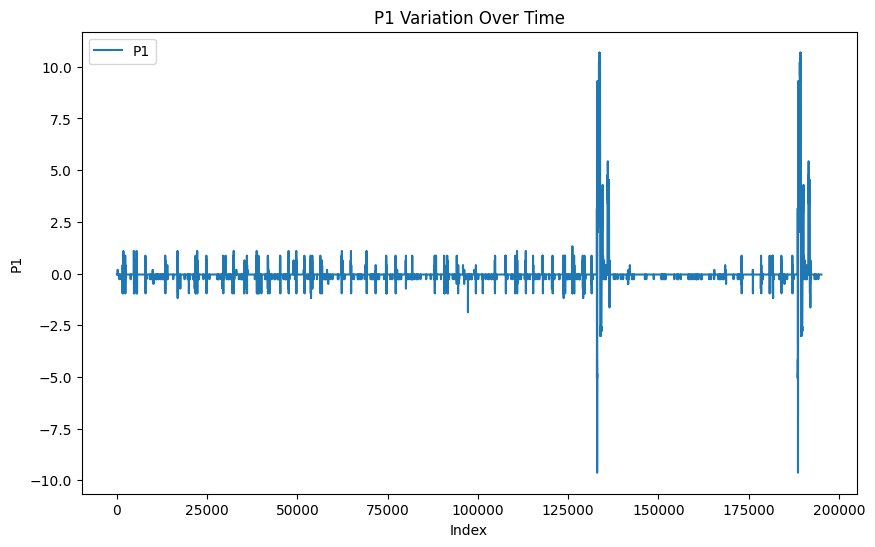

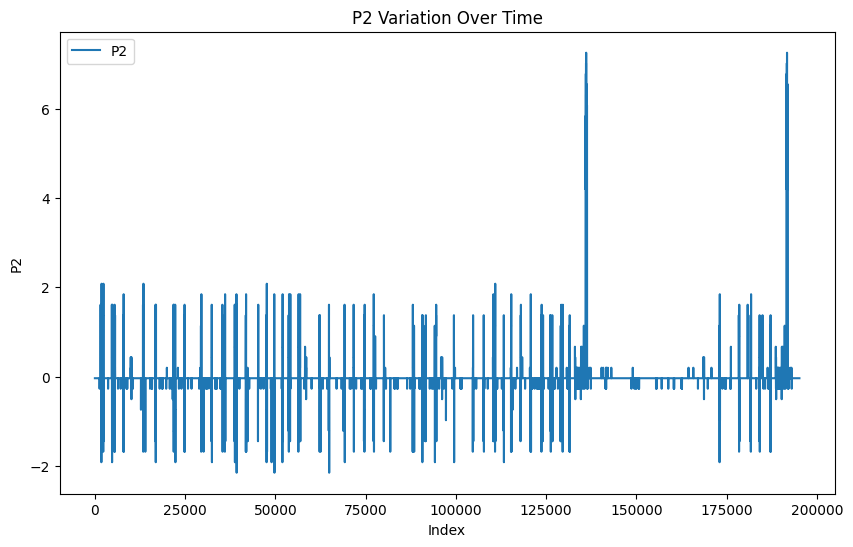

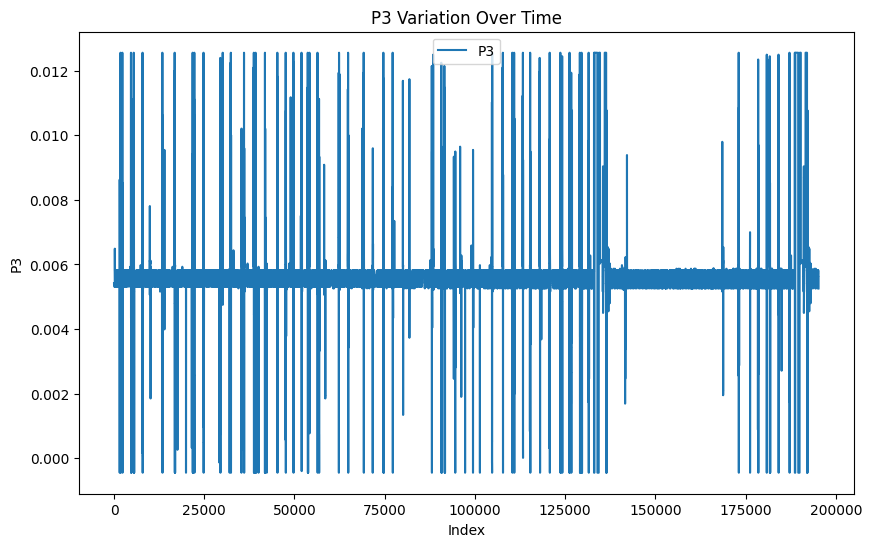

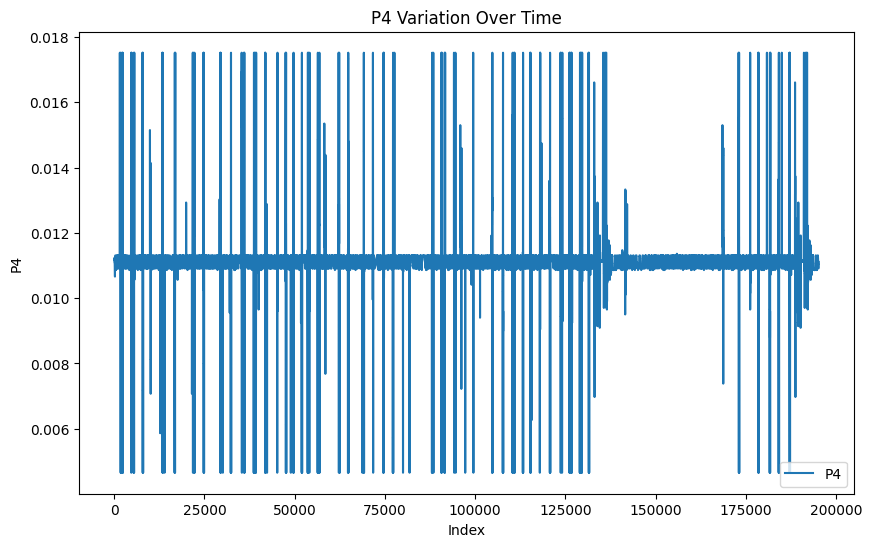

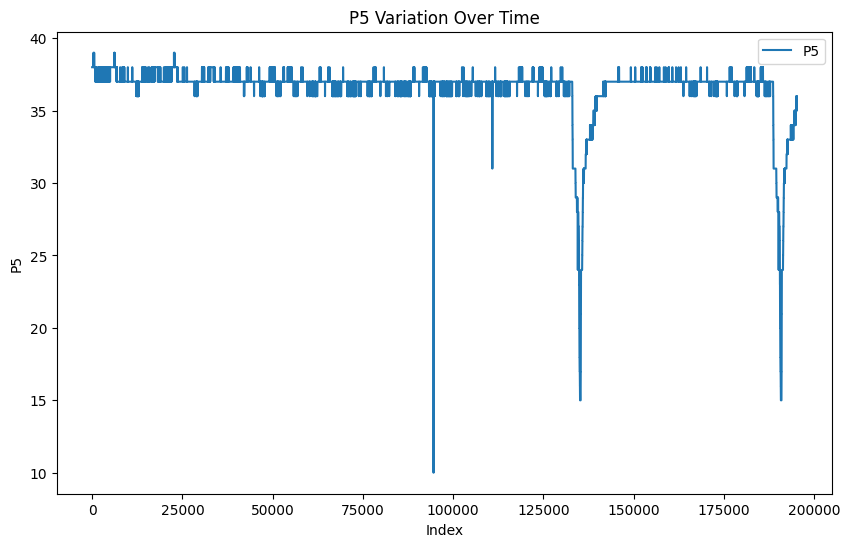

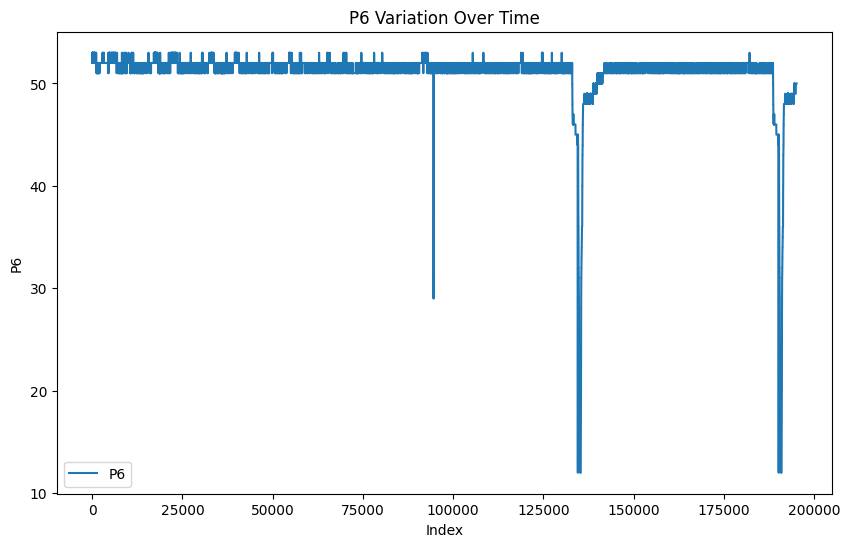

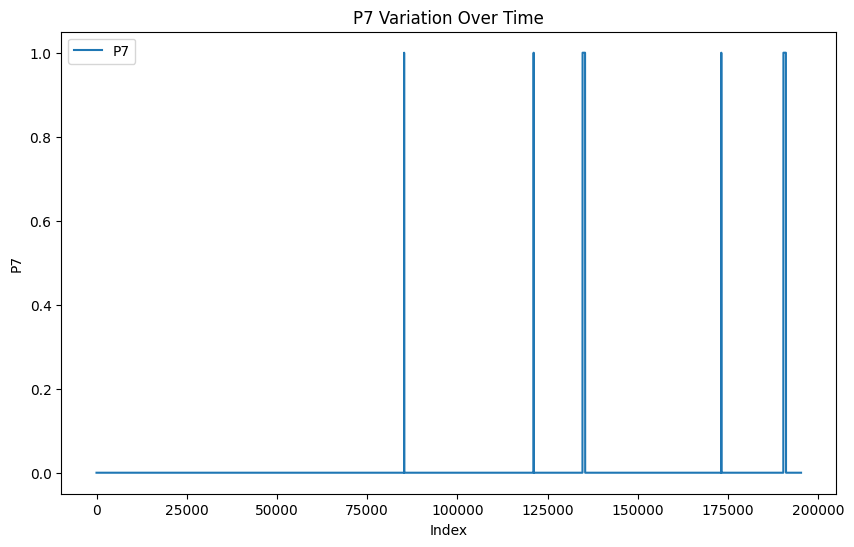

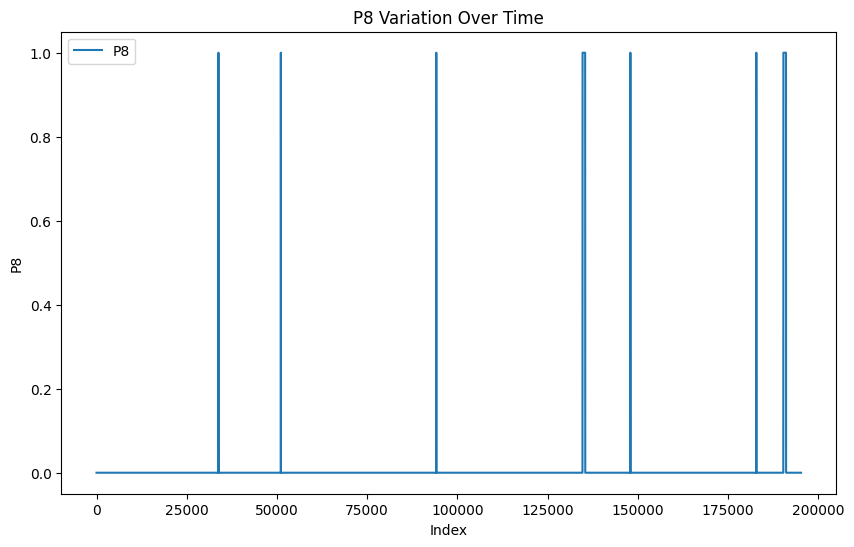

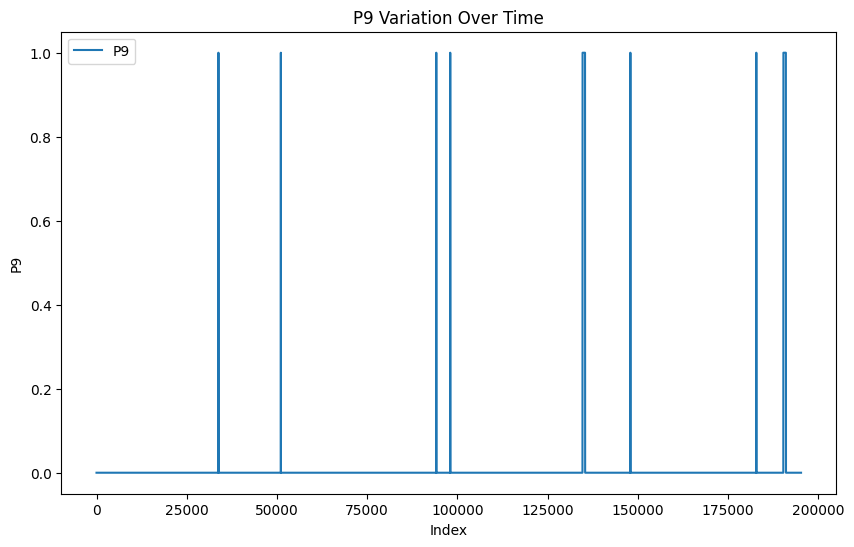

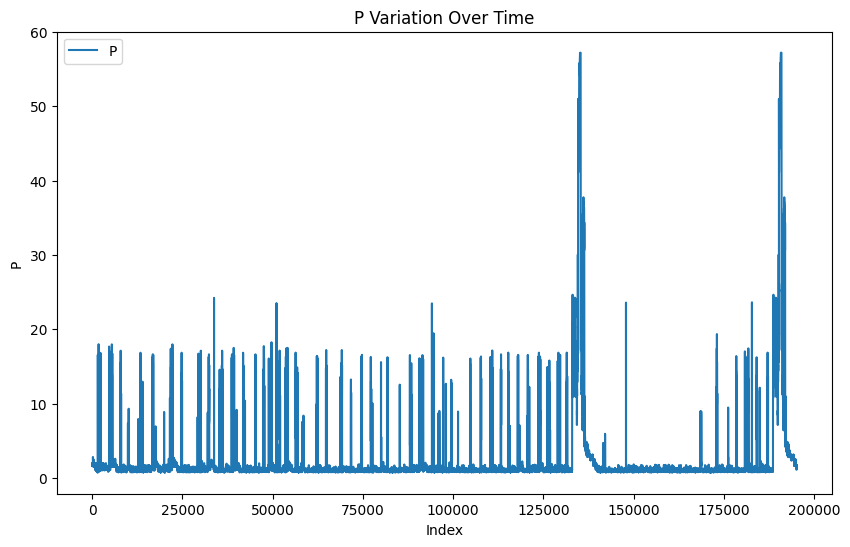

In [62]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Date', 'Time', 'P1', 'P2', ..., 'P9'
# If 'Date' and 'Time' have leading/trailing whitespaces, remove them
df.columns = df.columns.str.strip()

# If 'Date' and 'Time' are not needed for plotting, you can drop them
params_to_plot = df.drop(['Date', 'Time'], axis=1, errors='ignore')

# Plot each parameter separately
for param in params_to_plot.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df[param], label=param)
    plt.title(f'{param} Variation Over Time')
    plt.xlabel('Index')
    plt.ylabel(param)
    plt.legend()
    plt.show()


In [10]:
print(df.columns)


Index(['Date\t', 'Time', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype='object')


In [99]:
# import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset
df = pd.read_csv("Dataset5.csv")

df.rename(columns={"Date\t":"Date"})



,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,15-10-2011,39:55.0,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
1,15-10-2011,39:55.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
2,15-10-2011,39:57.1,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
3,15-10-2011,39:58.6,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
4,15-10-2011,40:02.2,-0.0469,-0.0385,0.00542,0.01121,38,52,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195170,20-11-2011,58:20.2,-0.0469,-0.0385,0.00531,0.01106,36,50,0,0,0
195171,20-11-2011,58:21.2,-0.0469,-0.0385,0.00531,0.01106,36,50,0,0,0
195172,20-11-2011,58:21.7,-0.0469,-0.0385,0.00526,0.01111,36,50,0,0,0
195173,20-11-2011,58:23.2,-0.0469,-0.0385,0.00526,0.01111,36,50,0,0,0


In [101]:
# Assuming 'Date' and 'Time' are not features for anomaly detection
features = df.columns[2:]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

# Build the autoencoder model
input_layer = Input(shape=(len(features),))
encoded = Dense(64, activation='selu')(input_layer)
decoded = Dense(len(features), activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder on the entire dataset
autoencoder.fit(data_scaled, data_scaled, epochs=1, batch_size=32, shuffle=True)

# Make predictions on the entire dataset
predictions = autoencoder.predict(data_scaled)

# Calculate reconstruction errors
mse = np.mean(np.square(data_scaled - predictions), axis=1)

# Define a threshold for anomaly detection
threshold = 0.2  # You may need to tune this based on your data

# ...

# ...

# Identify anomalies and print their indices and corresponding dates
anomaly_indices = np.where(mse > threshold)[0]
print("Number of anomalies:", len(anomaly_indices))
print("Anomaly indices and corresponding dates:")
for idx in anomaly_indices:
    print(f"Index: {idx}, Date: {df.iloc[idx]['Date']}")



6100/6100 [==============================] - 7s 1ms/step
Number of anomalies: 17
Anomaly indices and corresponding dates:


KeyError: 'Date'

In [103]:
# import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset
df = pd.read_csv("Dataset5.csv")

# Extract 'Date' and 'Time' columns
datetime_columns = df[['Date', 'Time']]

# Exclude 'Date' and 'Time' from features for anomaly detection
features = df.columns[2:]

# Standardize the data (excluding 'Date' and 'Time' columns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

# Build the autoencoder model
input_layer = Input(shape=(len(features),))
encoded = Dense(64, activation='selu')(input_layer)
decoded = Dense(len(features), activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder on the entire dataset
autoencoder.fit(data_scaled, data_scaled, epochs=1, batch_size=32, shuffle=True)

# Make predictions on the entire dataset
predictions = autoencoder.predict(data_scaled)

# Calculate reconstruction errors
mse = np.mean(np.square(data_scaled - predictions), axis=1)

# Define a threshold for anomaly detection
threshold = 0.2  # You may need to tune this based on your data

# Identify anomalies and print their indices and corresponding dates and times
anomaly_indices = np.where(mse > threshold)[0]
print("Number of anomalies:", len(anomaly_indices))
print("Anomaly indices and corresponding dates and times:")
for idx in anomaly_indices:
    print(f"Index: {idx}, Date: {datetime_columns['Date'].iloc[idx]}, Time: {datetime_columns['Time'].iloc[idx]}")


KeyError: "['Date'] not in index"